# Mechanics of plotting in Matplotlib

Now that we have worked with Pandas visualisation we will start getting to know Matplotlib, the library underlying the Pandas plotting tools. 
For this we will import the `matplotlib` package along with `pyplot` module and give it the alias `plt` which is the naming convention for this module. [Here](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) you can see all of the functions available in this module. But don't worry, you are not supposed to memorize all of them. 

In [3]:
# Import Matplotlib package and pyplot module
import matplotlib.pyplot as plt

# Import Pandas and Numpy libraries
import pandas as pd
import numpy as np

# 1. Style sheets

Matplotlib offer several types of style sheets you can use. [Here is a showcase](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) of various style sheets applied to some common plots. It is also possible to create your own custom style for which you can define attributes such as the size of labels or markers, etc. To return all available style sheets, run the code below. Feel free to explore them.

In [4]:
# Available style sheets
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [5]:
# Setting a style 
plt.style.use('default')

# 2. Figure object and creating subplots

Matplotlib draw data on a Figure object. Any such Figure object can contain 1 or more Axes.

In [6]:
# Create a Figure object
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

For creating a new Figure object we can use `plt.figure()` which accepts several parameters. We see that the created Figure object is of size 432x288 which represents the width and height in inches (6.4x4.8 by default). We can change the size of the figure using the `figsize` parameter where we define the desired size in the form of a tuple.

In [7]:
fig = plt.figure(figsize=(20,15))

<Figure size 2000x1500 with 0 Axes>

The size of the Figure object has changed to 1440x1080. Notice that our figure does not contain any axes so far. To generate a single Axes object or multiple subplots we can use `plt.subplots()`.

matplotlib.axes._subplots.AxesSubplot

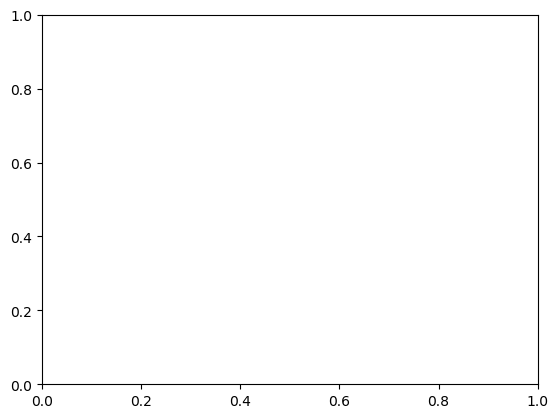

In [8]:
# Create a single Figure object and Axes object (subplot)
fig, ax = plt.subplots()
type(ax)

We have created a Figure object within wich there is an Axes object labeled as AxesSubplot. Now that we have created an Axes object you can see the change of the figure size. 

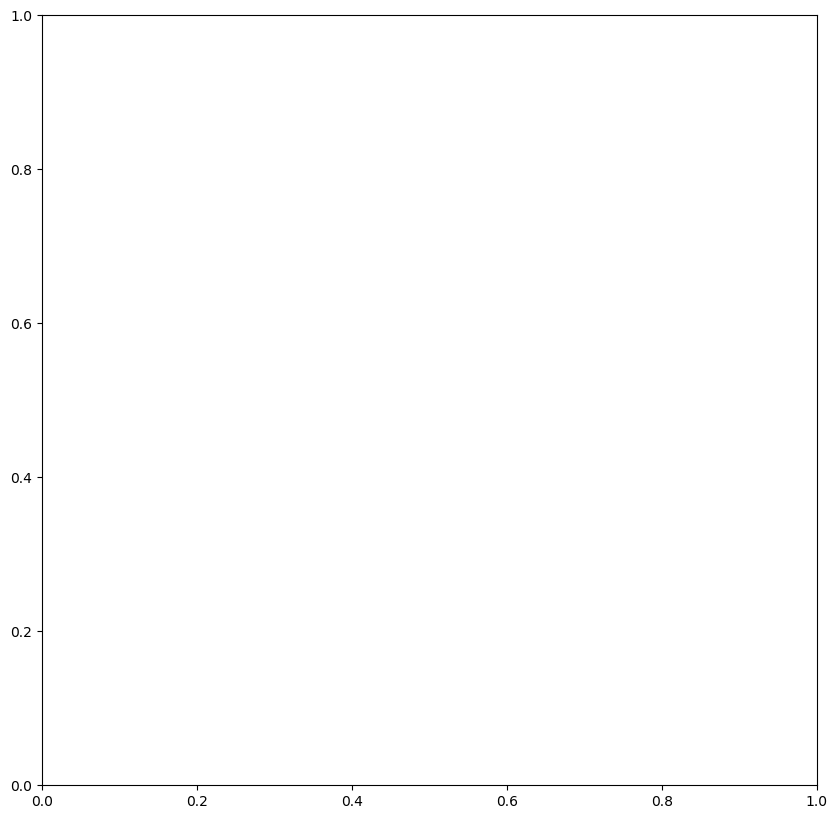

In [9]:
# Customize the Figure object size
fig, ax = plt.subplots(figsize=(10,10))

To generate a set of multiple subplots we define the particular number of rows and columns. For example, if we would like to have 6 subplots while 3 of them should be in one row we would write it like you can see below:

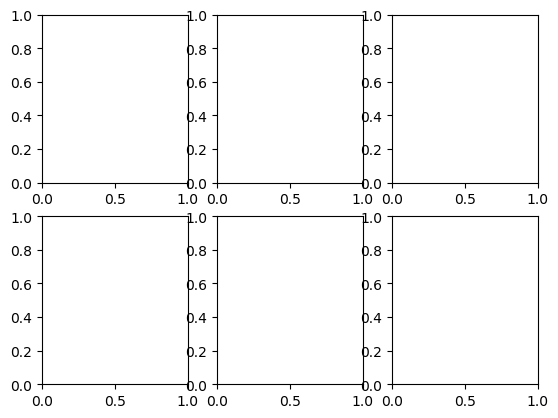

In [10]:
# Create 6 subplots
fig, ax = plt.subplots(2,3)

Our subplots are now overlapping. But we can easily adjust spacing between the Figure edge and subplots' edges using `plt.tight_layout()`.

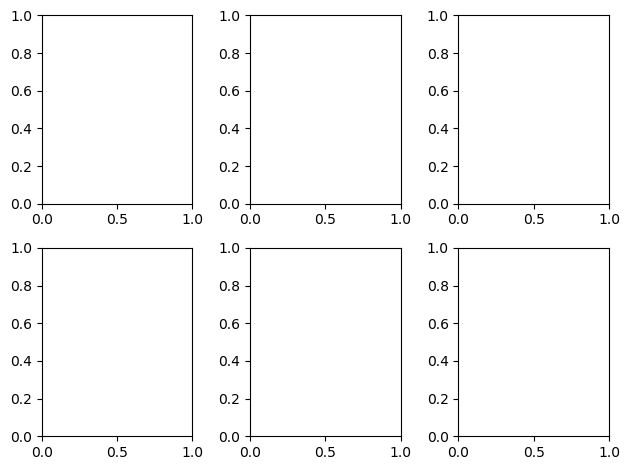

In [11]:
fig, ax = plt.subplots(2,3)
plt.tight_layout()

`plt.tight_layout()` can take parameters such `h_pad` and `w_pad` to customize spacing between edges of adjacent subplots.

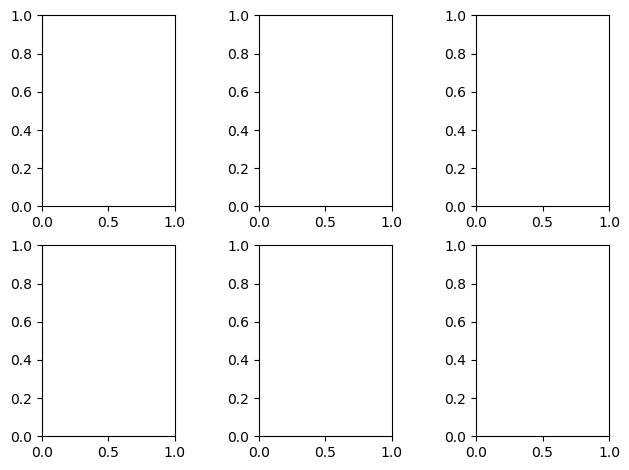

In [12]:
fig, ax = plt.subplots(2,3)
plt.tight_layout(h_pad = 0.7, w_pad = 3)

# 3. Two faces of Matplotlib

1. **MATLAB-style interface**
At the beginning, Matplotlib was originally created in Python as an alternative to MATLAB. Since the plotting style of MATLAB is within the pyplot (plt) interface, some of its syntax is reflected also in Matplotlib.  


2. **Object Oriented interface**  
This plotting approach is more convenient when you would like to have more control over your plots. You create a grid of subplots and are able to access a certain Axes object to draw a plot. 

Let's demonstrate the main characteristics of these two interfaces.

## 3.1 Line plot

Let's create a Figure object and 3 subplots of line plot using a generic `.plot()` function in MATLAB-style interface.

Using `plt.subplot()` we create 3 subplots where the following is specified:

- **number of rows**

- **number of columns**

- **index:**  
this is the position of subplot in the grid    
index starts always at 1 in the left upper corner (red line plot in our example below), and increases to the right 

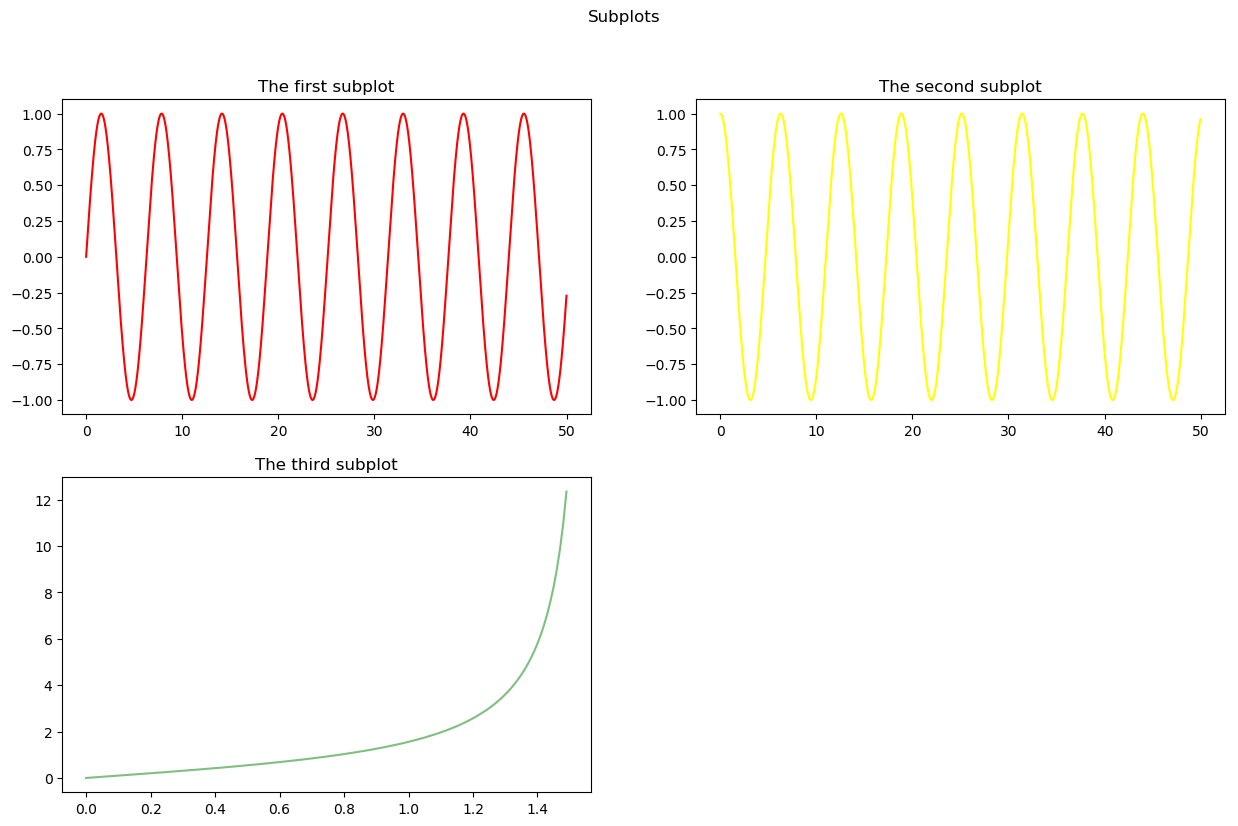

In [13]:
# Example data for plotting
data = np.arange(0.0, 50, 0.01)
# Sine
s = np.sin(data)
# Cosine
c = np.cos(data)
# Example data for plotting
tg = np.arange(0.0, 1.5, 0.01)
# Tangent
t = np.tan(tg)

# Create a Figure object
plt.figure(figsize = (15,9))

# Create a first subplot
plt.subplot(2,2,1)               # 2 rows, 2 columns, the first subplot is active
plt.plot(data,s,                 # Calling plot function on the first subplot
         color = 'red')            
plt.title('The first subplot')   # A title of a subplot

# Create a second subplot
plt.subplot(2,2,2)               # 2 rows, 2 columns, the second subplot is active
plt.plot(data,c,                 # calling plot function on the second subplot
         color = 'yellow')                  
plt.title('The second subplot')

# Create a third subplot
plt.subplot(2,2,3)               # 2 rows, 2 columns, the third subplot is active
plt.plot(tg,t,                   # calling plot function on the third subplot
        'green',    
         alpha = 0.5)                 
plt.title('The third subplot')
plt.suptitle('Subplots');        # A title of the whole Figure object

By specifying for example `plt.subplot(2,2,1)` we activate the first subplot. After activating a certain subplot, all functions we call will be applied only to this Axes object. Thus this process is "stateful". It means that Matplotlib keeps track of the active Axes (and Figure object).

Now let's recreate a Figure using the Object-oriented interface of Matplotlib. With this approach you do not need to worry about which Axis is active right now. Plotting functions are applied explicitly to the Axes object you select. 

If you have a Subplot grid consisting of 2 subplots you can access the specific axis by indexing according its position. In this case indexing starts at zero. 

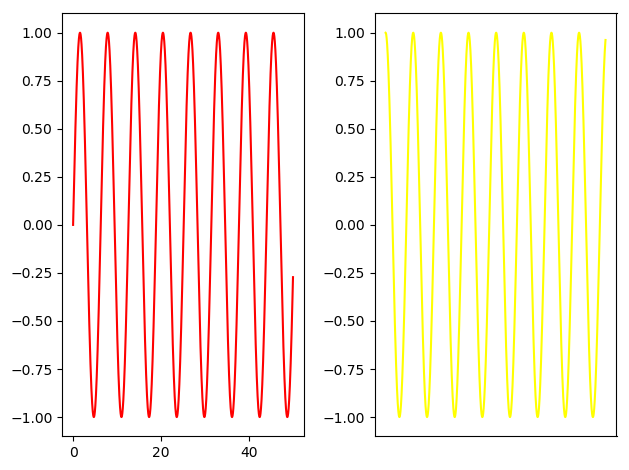

In [14]:
# Create a Figure and a grid of subplots
fig1, ax = plt.subplots(1,2)

# The first subplot is accessible by ax[0]
ax[0].plot(data, s, color = 'red')

# The second subplot is accessible by ax[1]
ax[1].plot(data, c, color = 'yellow')

# Removing x-axis tick labels (in a case it´s appropriate)
ax[1].set_xticks([])  

# Adjust the padding between subplots
plt.tight_layout()

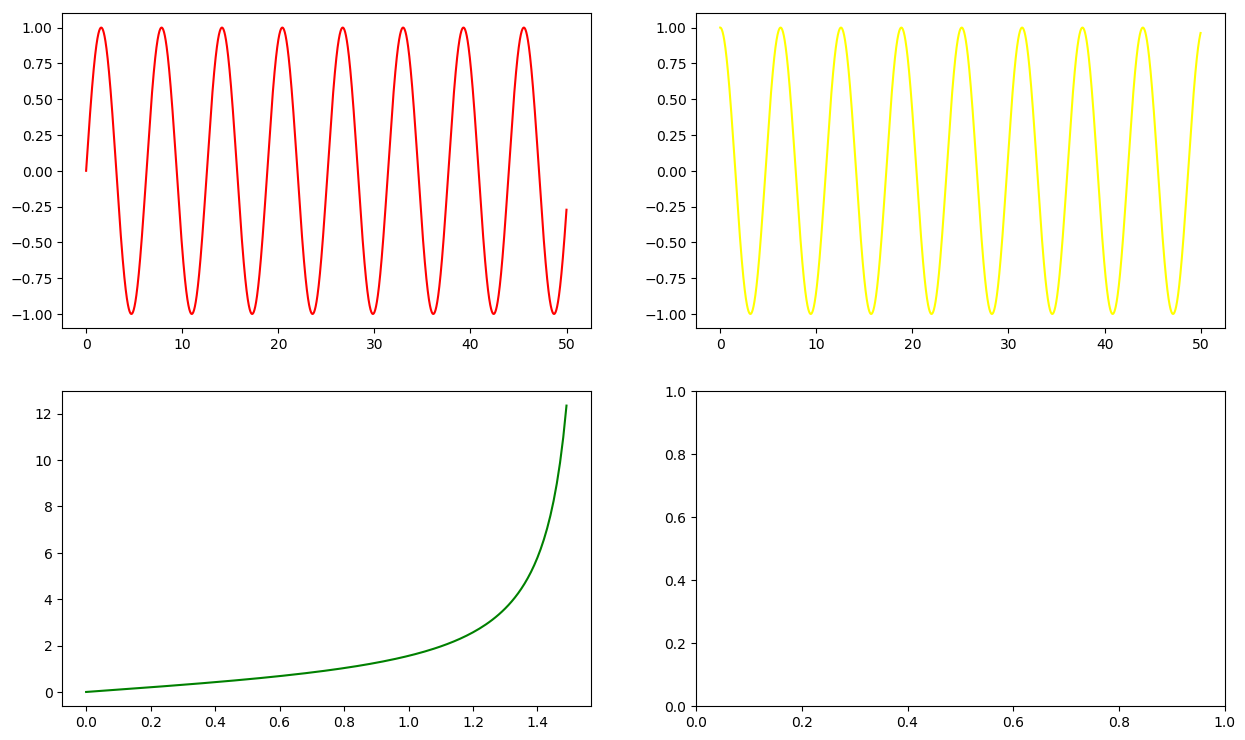

In [15]:
# Create a Figure object and 3 subplots
fig, ax = plt.subplots(2,2, figsize = (15,9))

# The first red plot is placed in the first row and the first column
ax[0,0].plot(data, s, color = 'red')

# Then we move to the right to the yellow plot - first row and second column
ax[0,1].plot(data, c, color = 'yellow')

# Then the green plot in the down left corner - the second row and the first column
ax[1,0].plot(tg, t, color = 'green');

# At position row 2 and column 2 the subplot is empty

The output of `plt.subplots(2,2)` is 2-dimensional array, thus the location of Axes objects are specified by their respective rows and columns. 

It's up to you which plotting approach you choose for creating plots. But the general recommendation is as follows: Use MATLAB-like plotting style only when you are creating simple plots. For advanced Figures with more than 1 subplot or other added components, use the object oriented plotting approach which gives you ultimate control over you axes.

### 3.1.1 Line plot customization

Let's plot the newly created x variable against the y variable. Firstly, we create a Figure object and an Axes object using `plt.subplots()`. Then you can call the `.plot()` function right onto the Axes object to generate a line plot, where we specify particular properties to our line such as labels, annotations, specified size, etc.  

___
We want our line to be a **light green 'dashdotted' line containing red point markers with white color in the middle pointing to each of the data points**. 

Phew! That's a lot of conditions. However, with Matplotlib you can customize every object within the Axes.
Additionally, we would like to give a name to our graph and have a labeled axis to make the graph more readable and understandable for the audience. You might want to additionally set a vertical or horizontal line to depict some value or range of values. 

But keep in mind, there is a beauty in simplicity.

In [16]:
# Set the random seed to generate exactly the same output as in this notebook
# Generate a sequence of random numbers
x_var = list(range(15))
np.random.seed(42)
y = np.random.randint(low = 5, high = 50, size = 15)

# Examine the output
print(y)

[43 33 19 47 12 25 43 23 27 15 15 28 40 44 28]


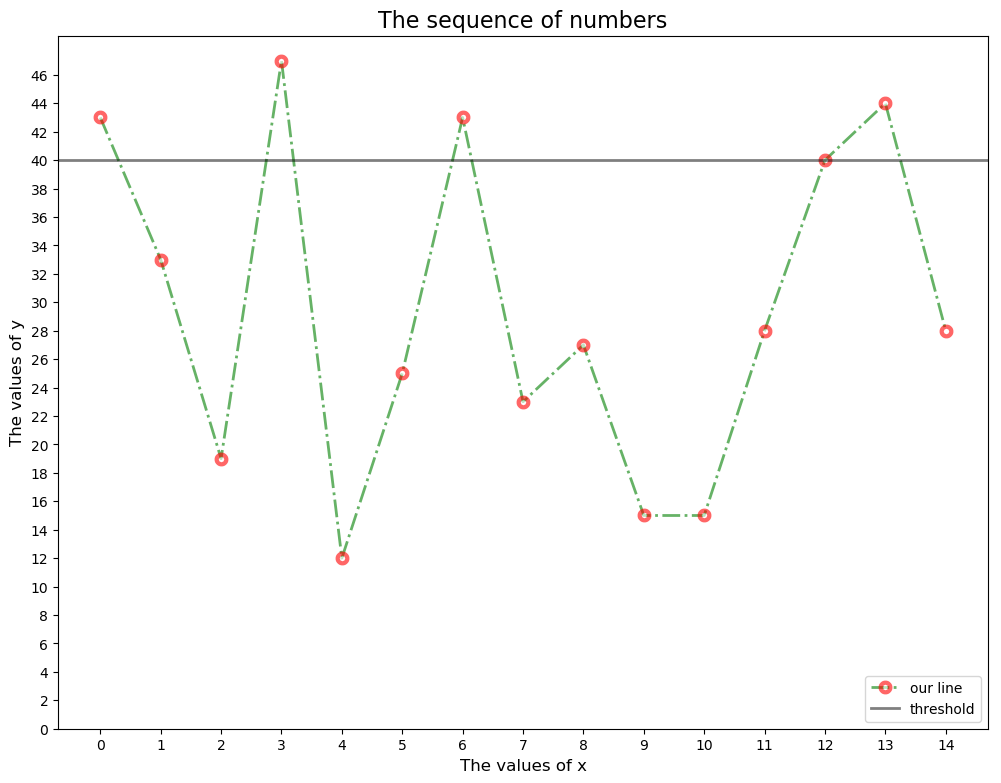

In [36]:
# Create a Figure and Axes objects with defined size
fig, ax = plt.subplots(figsize = (12,9))   

# Plot x against y using plot() function
ax.plot(x_var,y, color = 'green', linestyle = '-.', linewidth = 2,# Plot x vs. y, set a color, style and wodth of a line
        alpha = 0.6, marker = '.', markeredgewidth = 7,           # Set a transparency of colors, marker type and its width
        markeredgecolor='red', markerfacecolor = 'white')         # Set a color of a marker and white color within a marker                                     
                                                                  
ax.set_title('The sequence of numbers', fontsize = 16);           # Set a title of graph and a fontsize
ax.set_xlabel('The values of x', fontsize = 12)                   # Set x-axis label and a fontsize
ax.set_ylabel('The values of y', fontsize = 12)                   # Set y-axis label and a fontsize

ax.axhline(y = 40, linewidth = 2, alpha = 0.5, color = 'black');  # Set horizontal line emphasises a value of y-axis
ax.legend(['our line','threshold'], loc = 4)                      # Set the labels of line in the legend and its location 

# TASK 1 >>> Observe the frequency of ticks, then uncomment these 2 lines to see the difference
#        >>> Find the explanation of x and y ticks in the text below the line plot
plt.xticks(np.arange(start = 0, stop = len(x_var), step = 1))
plt.yticks(np.arange(start = 0, stop = max(y), step = 2));

The frequency of ticks are generated by Matplotlib in the way that is the most suitable given the data. We can see that ticks on the x-axis start at 0 and end at 14 while the values are increasing by 2. The y-axis ranges from 15 to 45 by steps of 5. 
If we would like to customize the frequency of ticks we can use `plt.xticks` and `plt.yticks` to do so. Take a closer look at the original ticks and then uncomment those two rows in the previous cell to see the difference. The new positions of ticks are set using Numpy's `arange()` function where we define the start and end of the interval and the desired spacing between the values. In case of the x-axis, the tick's stopping point is defined as the length of the variable x and values increase set by 1. The last tick on the y-axis is defined as the maximum value of the variable y plus 2 additional numbers. 
Try to change these values for yourself to see how the position of ticks will adjust.

## 3.2 Histogram

To create a histogram of a variable we can use the `hist()` function where a set of parameters can be specified. See the [documentation](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html). 

We use `plt.subplots()` to create a Figure object and a grid of subplots (Axes objects), where we define 1 row and 2 columns so that our subplots will be created side-by-side. After that, we will have access to each of the Axes objects by their indices and can create plots. 

In [18]:
# For demonstration, we create random sample from a normal distribution using Numpy
np.random.seed(42)
x_var2 = np.random.normal(size = 150)

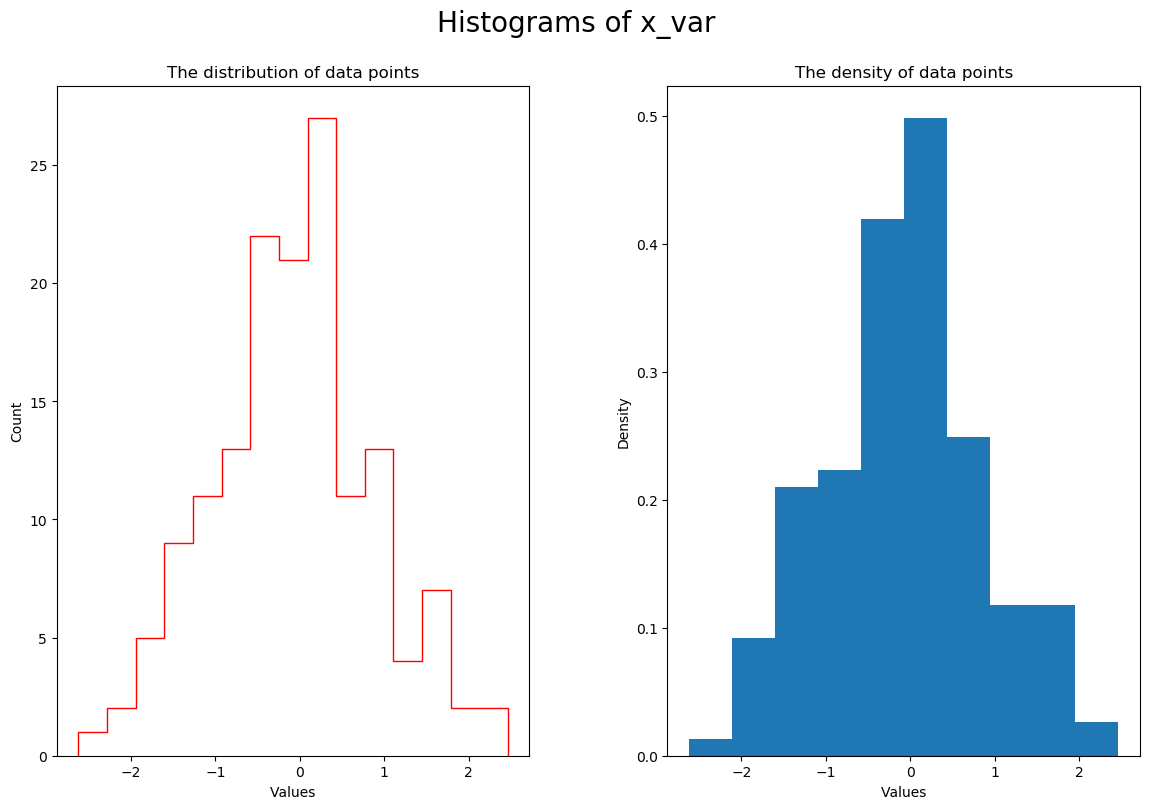

In [19]:
# Create a figure object and a subplot grid
fig, ax = plt.subplots(1,2, figsize = (13,9))

# Create a histogram in the first subplot
# Note that index starts at zero
ax[0].hist(x_var2, bins = 15, color = 'red',  histtype = 'step')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Count')
ax[0].set_title('The distribution of data points')

# Creare a density histogram in the second subplot
ax[1].hist(x_var2, bins = 10, density = True)
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Density')
ax[1].set_title('The density of data points')

# Adjust the padding between the edges of subplots
plt.tight_layout(pad = 6)

# Add a title to a Figure
# Adjust the position of a title using coordinates of a Figure
# Adjust the fontsize
fig.suptitle('Histograms of x_var', x = 0.5, y = 0.97, fontsize = 20);

Now it's time for a little practice with subplots and customization of plots. Your task is to create a figure with 4 subplots, but actually create only 2 plots: a histogram and a line plot. The remaining two subplots should be left empty. To get this done, use an object-oriented plotting approach to have a full control over the placement of plots. 

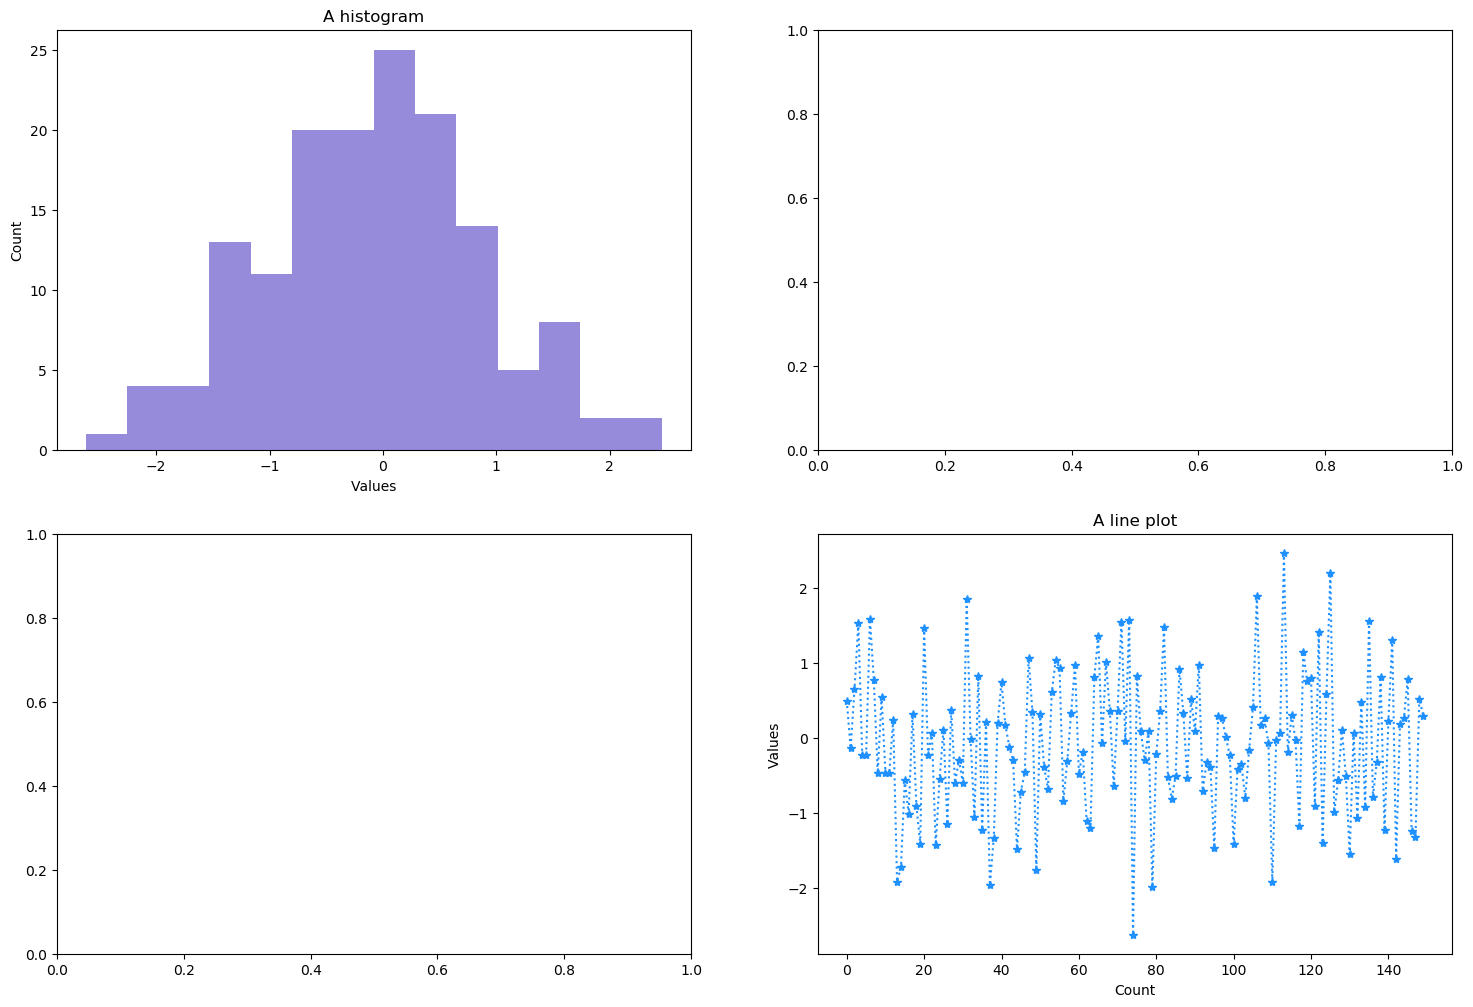

In [20]:
# TASK 2 >>> Now it's the time for a little practice with subplots
#        >>> Firstly create a Figure object with 4 subplots while only in 2 subplots the graph will be drawn
#        >>> Histogram:
#            Create a horizontal histogram of x_var2 variable that should be placed in the left upper corner
#            Set the number of bins to 14, set the color to 'slateblue', set the transparency to .7
#            Set x-axis label: 'Values'
#            Set y-axis label: 'Count'
#            Set a title: 'A histogram'
#        >>> Line plot:
#            Create a line plot of x_var that should be placed in the right down corner
#            Set the color to be 'dodgerblue', set 'dotted' style of the line and add marker '*'
#            Set x-axis label: 'Count'
#            Set y-axis label: 'Values'
#            Set a title: 'A line plot'

fig, ax = plt.subplots(2,2, figsize = (18,12))

ax[0,0].hist(x_var2, color = 'slateblue', alpha = .7, bins = 14)
ax[0,0].set_title('A histogram')
ax[0,0].set_xlabel('Values')
ax[0,0].set_ylabel('Count')

ax[1,1].plot(x_var2, color = 'dodgerblue', linestyle = 'dotted', marker = '*')
ax[1,1].set_title('A line plot')
ax[1,1].set_title('A line plot')
ax[1,1].set_xlabel('Count')
ax[1,1].set_ylabel('Values');

## 3.3. Boxplot

You can create a boxplot using the `plt.boxplot()` plotting function. See the documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html). There are several options for customizing the output, for example customizing elements of a boxplot. 

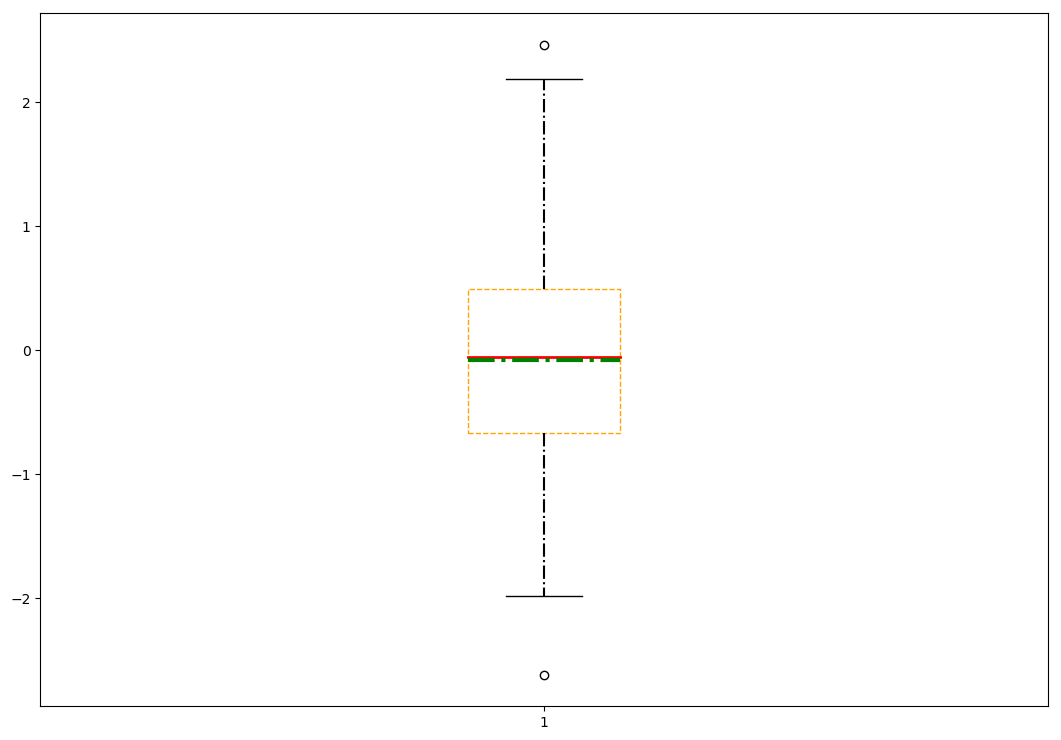

In [21]:
# Create a Figure
fig, ax = plt.subplots(figsize = (13,9))
# Create a boxplot of x_var variable
box_properties = dict(color = 'orange', linestyle = '--')           # Properties of a box
wh_properties = dict(linestyle = '-.',linewidth = 1.5)              # Properties of whiskers
median_line = dict(color = 'red', linewidth = 2)                    # Properties of median value
mean_line = dict(color = 'green', linewidth = 3, linestyle = '-.')  # Properties of mean value
ax.boxplot(x_var2,
           showmeans = True,                 # Show the mean
           meanline = True,                  # Displaying the mean as line within a box
           meanprops = mean_line,            # Properties of mean line
           boxprops = box_properties,        # Properties of a box
           whiskerprops = wh_properties,     # Properties of whiskers
           medianprops =  median_line);      # Properties of a median line

## 3.4 Barplot

To visualize and compare categorical features you can create a bar plot. The quantity of data points belonging to particular category will be drawn in the form of a bar. Matplotlib's `bar` function take several parameter such as:
- x: the coordinates of the bars
- height: the height of the bars, in other words, the amount of data points 

Other parameters include the bar's width or the alignemnt of the bars. Please refer to the documentation [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html).

-----
Now we'll create a barplot which depicts the top speed of different animals and compares them to Usain Bolt's top speed at the World Championships in 2009, which is 44.72 km/h. 

There are limitless options regarding adding and customizing things such as annotations, arrows or colors of your plots. All of these options are well-documented in Matplotlib's documentation.

In [22]:
animals = ['Horse','Pig','Cheetah','Coyote','Ostrich','Black Mamba']    
top_speed = [88,17.7,120,69,70,32.2]                            

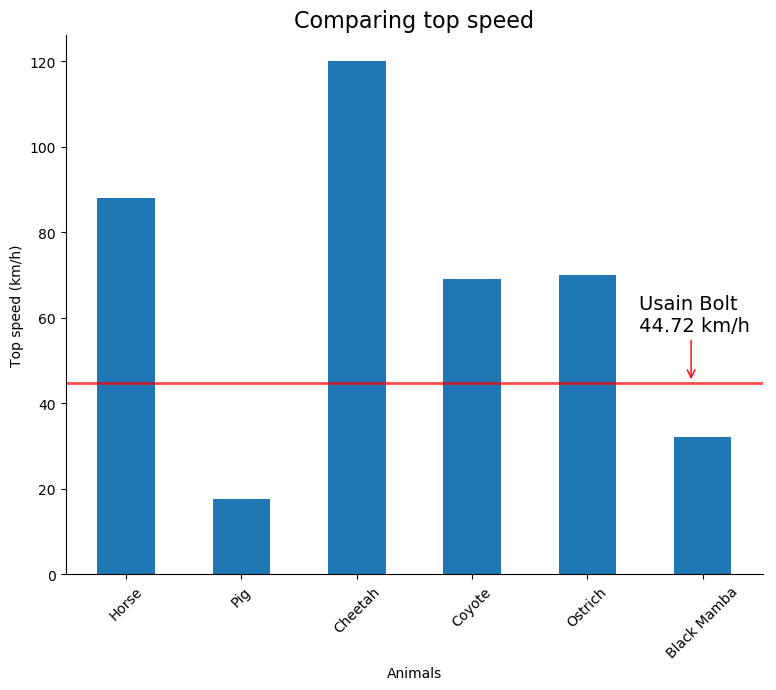

In [23]:
# Create a Figure object 
fig,ax = plt.subplots(figsize = (9,7))

# Inspect how the width of bars can change depending on the width parameter
ax.bar(animals, top_speed, width = 0.5)
# Eventually, add 'align = 'edge'' parameter to the above line of code to see how the alignment of the bars will change
#ax.bar(x_position, top_speed, width = 0.9, align = 'edge')

# Setting x-axis labels 
plt.xticks(animals)
# Setting x -axis labels rotation
plt.xticks(rotation = 45)
# Setting title of the plot, x-axis and y-axis labels
plt.title('Comparing top speed', fontsize = 16)
plt.xlabel('Animals')
plt.ylabel('Top speed (km/h)')

# Adding horizontal line to depict the top speed of Usain Bolt along with an arrow pointing to that line
ax.axhline(y = 44.72, linewidth = 2, alpha = 0.7, color = 'red')
ax.annotate('Usain Bolt \n 44.72 km/h', xy = (4.9,45), xytext=(4.9,57), ha = 'center', fontsize = 14,
           arrowprops = dict(arrowstyle = '->', color = 'red'))

# Removing top and left spines
ax.spines['top'].set(visible = False)         
ax.spines['right'].set(visible = False);

## Scatterplot

Using a scatterplot we can visualize a relationship between variables. The simple example below shows a relationship between the x and y variables created using Matplotlib's `scatter()` function.

In [24]:
# Sample data
x_sample = [5,10,15,20,25,30,35,30] 
y_sample = [34, 40,56,68,77,80,93,150]

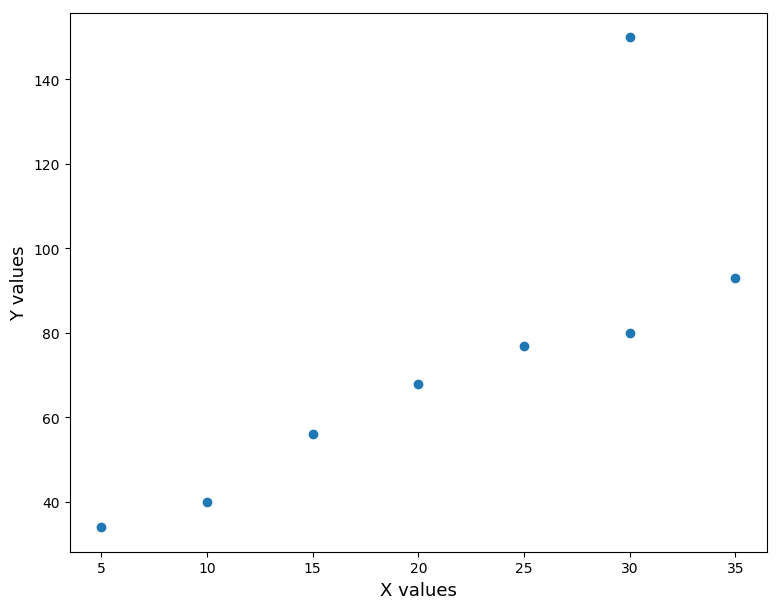

In [25]:
# A scatterplot
fig,ax = plt.subplots(figsize = (9,7))
plt.scatter(x_sample,y_sample)
plt.xlabel('X values', fontsize = 13)
plt.ylabel('Y values', fontsize = 13);

# Tasks
Let's load the real estate evaluation dataset that consists of 7 attributes.

**Attributes:**

- X1 transaction date
- X2 house age
- X3 distance to the nearest MRT station
- X4 number of convenience stores
- X5 latitude
- X6 longitude
- Y house price of unit area

In [28]:
# Load the data
houses = pd.read_excel('../Data/real_estate_valuation_data.xlsx')

In [29]:
# Take a look at the first five rows
houses

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


In [30]:
# Renaming columns
houses.rename(columns = {'X1 transaction date':'transaction_date','X2 house age':'age','X3 distance to the nearest MRT station':
                        'distance_to_metro','X4 number of convenience stores':'n_convenience_stores',
                        'Y house price of unit area':'price_unit_area'}, inplace = True)

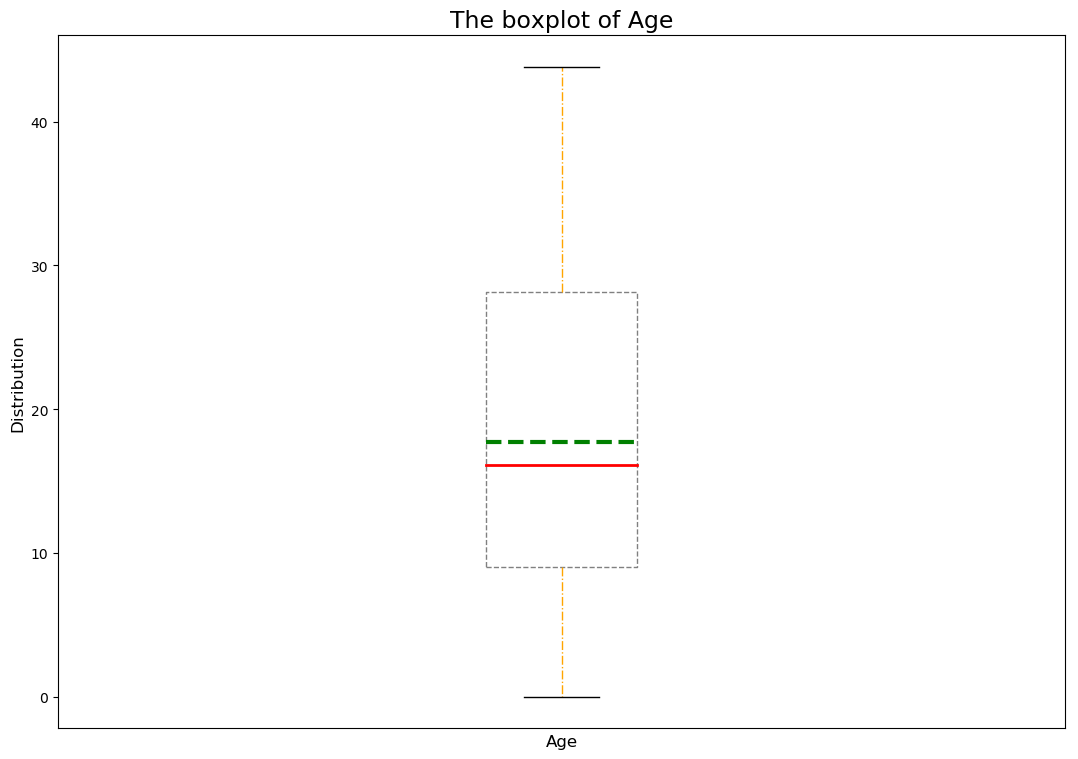

In [31]:
# TASK 3 >>> Create a boxplot of the 'age' feature
#        >>> Create a figure and set the size to (13,9)
#        >>> Call the boxplot() function on ax 
#        >>> Specify the properties for:
#             mean: green line with style '--' and size 3,
#             median: red line with the size 2,
#             whiskers: orange whiskers with line style '-.'
#             box: a gray box with line style '--'
#        >>> Disable x-tick labels
#        >>> Add x-axis label: 'Age' and y-axis label: 'Distribution'
#        >>> Add a title: 'The boxplot of Age' and set font size 17

fig, ax = plt.subplots(figsize = (13,9))
ax.boxplot(houses['age'], 
           meanline = True, 
           showmeans = True,
           boxprops = dict(color = 'gray', linestyle = '--'),
           whiskerprops = dict(color = 'orange', linestyle = '-.'),
           medianprops = dict(color = 'red', linewidth = 2),
           meanprops = dict(color = 'green',linestyle ='--',linewidth = 3))
ax.set_xticks([])
ax.set_xlabel('Age', fontsize = 12)
ax.set_ylabel('Distribution', fontsize = 12)
plt.title('The boxplot of Age', fontsize = 17);

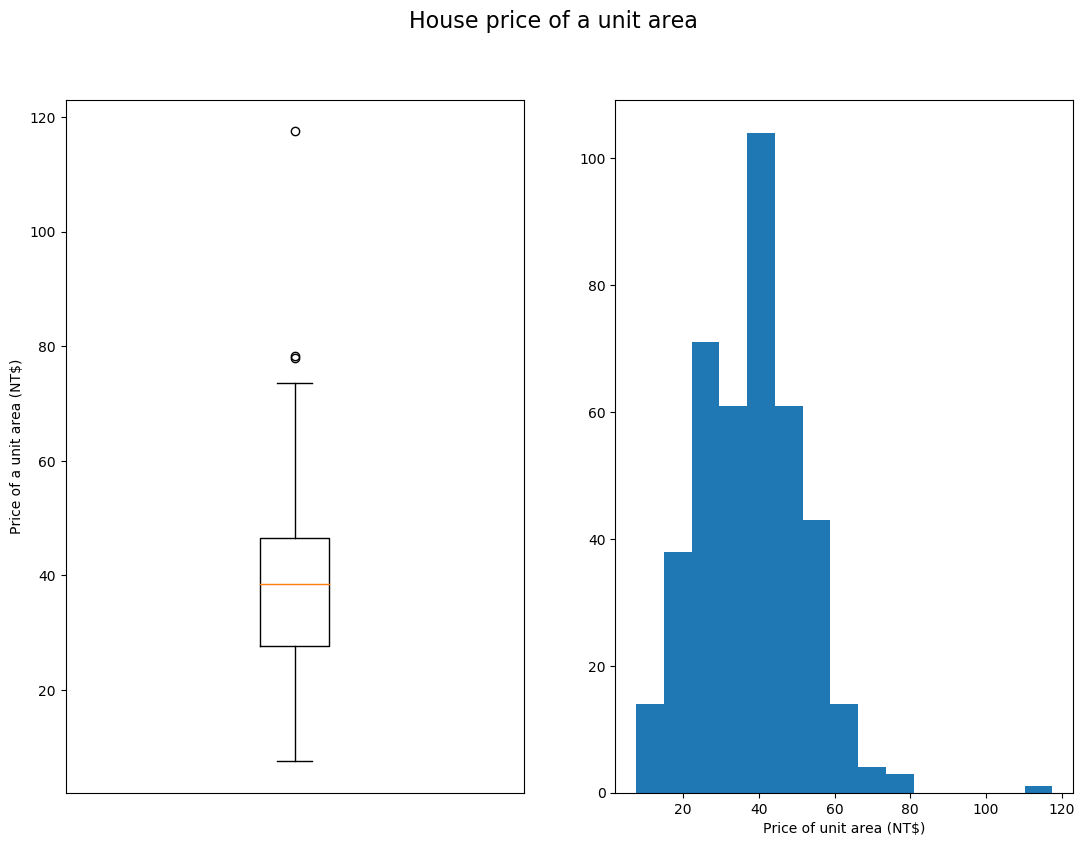

In [32]:
# TASK 4 >>> Create a boxplot and a histogram of the 'price_unit_area' feature
#        >>> Firstly, create a figure and set the size to (13,9)
#        >>> For creating these plots use MATLAB-style plotting using plt.subplot()
#        >>> The first subplot will be a boxplot:
#            Set y-axis label:'Price of a unit area (NT$)'
#            Disable x-tick labels
#        >>> The second subplot will be a histogram:
#            Set the number of bins to 15
#            Set x-axis label: 'Price of a unit area (NT$)'
#        >>> Set a title for the whole Figure: 'House price of a unit area' and fontsize: 16

plt.figure(figsize = (13,9))
plt.subplot(1,2,1)
plt.boxplot(houses['price_unit_area'])
plt.ylabel('Price of a unit area (NT$)')
plt.xticks([])
plt.subplot(1,2,2)
plt.hist(houses['price_unit_area'], bins = 15)
plt.xlabel('Price of unit area (NT$)')
plt.suptitle('House price of a unit area', fontsize = 16);

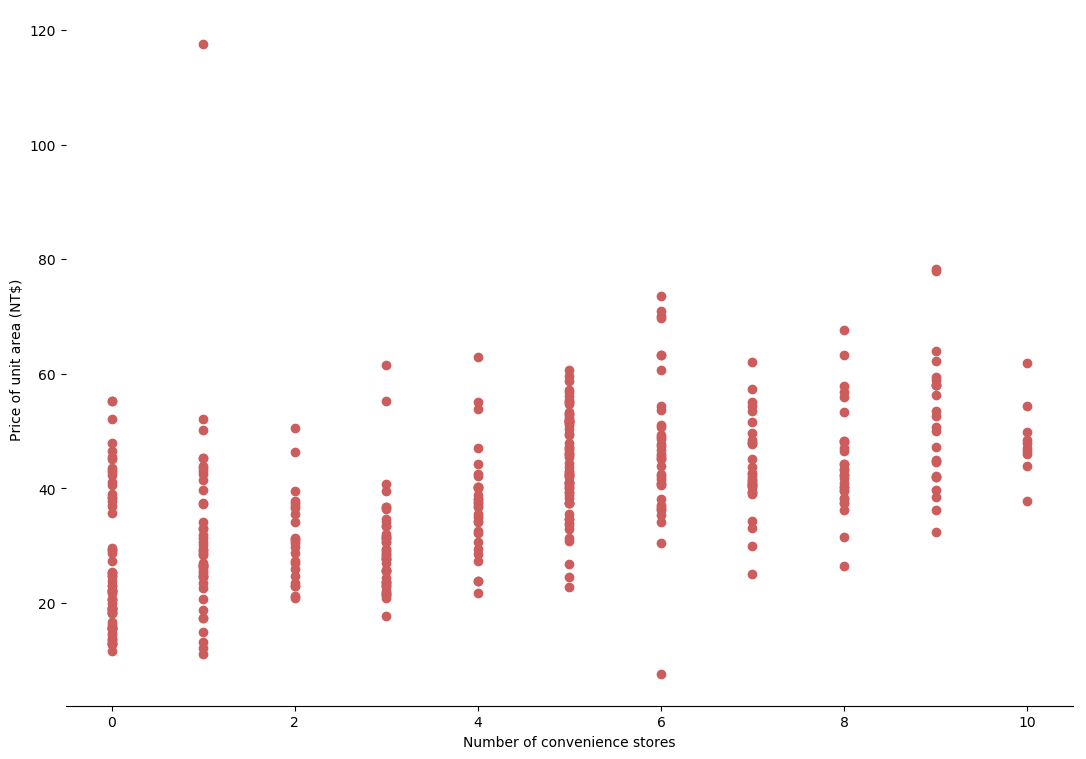

In [33]:
# TASK 5 >>> Create a scatterplot of 'n_convenience_stores' and 'price_unit_area' to see their relationship
#        >>> Create a figure and set the size to (13,9)
#        >>> Call scatter() function on ax, specify features and set the color to 'indianred'
#        >>> Remove top, right and left spines from plot
#        >>> Set x-axis lalel: 'Number of convenience stores' 
#        >>> Set y-axis label: 'Price of unit area (NT$)'

fig, ax = plt.subplots(figsize =(13,9))
ax.scatter(houses['n_convenience_stores'], houses['price_unit_area'], color = 'indianred')
ax.spines['top'].set(visible = False)
ax.spines['right'].set(visible = False)
ax.spines['left'].set(visible = False)
plt.xlabel('Number of convenience stores')
plt.ylabel('Price of unit area (NT$)');

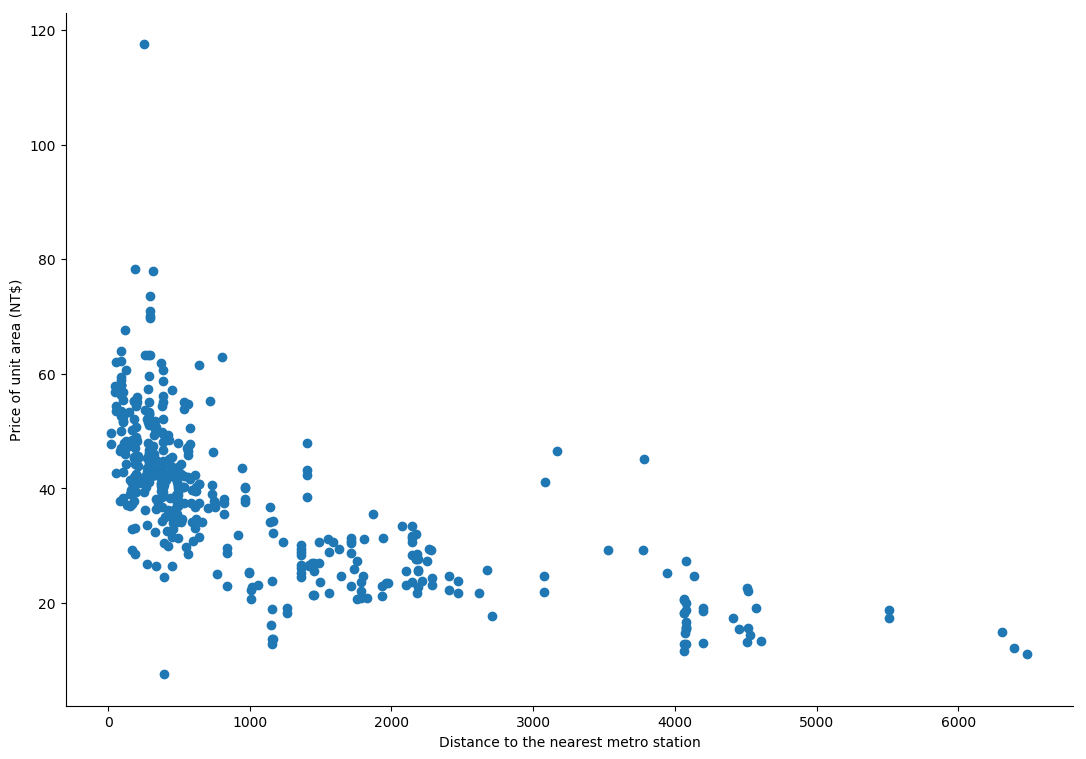

In [34]:
# TASK 6 >>> Create a scatterplot of 'distance_to_metro' and 'price_unit_area' to see a relationship between them
#        >>> Create a Figure and set the size to (13,9) 
#        >>> Using plt.scatter() create a scatterplot of the features
#        >>> Remove top and left spines
#        >>> Set x-axis label: 'Distance to the nearest metro station'
#        >>> Set y-axis label: 'Price of unit area (NT$)'

fig, ax = plt.subplots(figsize =(13,9))
plt.scatter(houses['distance_to_metro'], houses['price_unit_area'])
ax.set_xlabel('Distance to the nearest metro station')
ax.set_ylabel('Price of unit area (NT$)')
ax.spines['top'].set(visible = False)         
ax.spines['right'].set(visible = False);

## Citation request: 
Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.  

Material adapted for RBI internal purposes with full permissions from original authors. [Source](https://github.com/zatkopatrik/authentic-data-science)